# Data Science Project: Assessment 3

ID:201484773

Name:Aishwarya Sunderrajan

This assessment has a 60% weight.

## Case study

Refer to the brief

## 1. Aims, objectives and plan (4 marks)

### a) Aims and objectives
Although we have already stated what is required, please formally state the aims and objectives of the project in your own words.

100-200 words

The given dataset contains transaction details of fraudulent and normal transactions. Most attributes have undergone PCA analysis in order to protect confidential details such as credit card number, cvv, expiry date and so on. The aim of this project is to conduct preliminary analysis on the given 'creditcard.csv' dataset to make initial inferences and create a model to analyse the data. The dataset is divided into fraudulent and normal transactions which the model should successfully identify when run on the test set. Two techniques are to be tested and then compared accordingly with the help of performanec metrics.

The objectives comprise of the following:
1. Perform exploratory analysis on credit card data
2. Establish relationships or patterns between various attributes and pre-process the data
3. Classify transactions as Fraudulent or Normal using appropriate models and use performace metrics to evaluate the models
4. Present findings in a technical report

###  b) Plan
Please demonstrate how you have conducted the project with a simple Gantt chart.

##### Gantt Chart for credit card fraud detection project

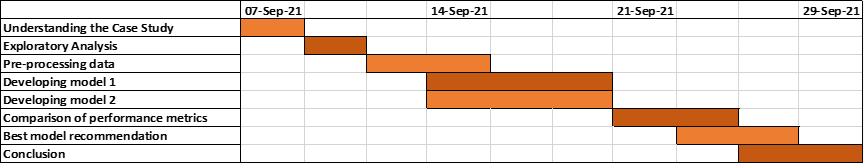

## 2. Understanding the case study (4 marks)

###  Case study analysis
State the key points that you found in the case and how you intend to deal with them appropriately to address the bank's needs. (You can include more than four points.)

200-300 words

1. The aim is to identify suspicious credit card transactions for further fraud investigation using the given data-set (creditcard.csv). This is to be solved with the use of two models which can successfully predict if a transaction is fraudulent or not. Each record in the data-set contains an indicator which is set to 1 if the transaction is fraudulent or 0 is it is a normal transaction. This is a type of imbalanced binary classification problem where fraudulaent transactions are the positive class.
<br>

2. Original attributes of the data-set have been transformed using PCA analysis to protect sensitive information such as credit card number, cvv, expiry date, place of transaction, card holder name and so on. This was also done to reduce dimansionality i.e. retain meaningful properties. Only 'Time', 'Amount' and 'Class' have not been transformed.
<br> 

3. The bank's total budget for this project is £1,000,000, therefore the cost of the project, including all mis-classifications should fall within this limit and the goal is to minimze the cost as much as possible.
<br>

4. If a transaction is predicted to be fraudulent and turns out not to be (false positive), it costs the bank  £1000. A budget of £20,000 is allowed for each £100,000,000 of non-fraudulent transactions. False positives result in poor customer satisfaction ratings.
<br>

5. If a transaction is fraudulent but is not identified by the model (false negative), it costs the bank £10,000. A budget of £50,000 is allowed for each £200,000 of fraudulent transactions. False negatives result in poor bank reputation and costs them future customers.



###  Preliminary analysis

#### Data loading

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
import numpy as np

#DATA LOADING
cdf = pd.read_csv('creditcard.csv')
cdf.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [2]:
#CHECK DATA TYPE
cdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

#### Checking for missing values

In [3]:
#CHECK FOR MISSING VALUES
cdf.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

#### Statistical analysis of data

In [4]:
#PRELIMINARY CALCULATIONS
cdf.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.758702e-12,-8.252296e-13,-9.637438e-13,8.316234e-13,1.592013e-13,4.247308e-13,-3.050183e-13,8.692882e-14,-1.179710e-12,...,-3.406538e-13,-5.713357e-13,-9.725290e-13,1.464144e-12,-6.989090e-13,-5.615254e-13,3.332111e-12,-3.518885e-12,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


#### Checking if dataset is balanced

fraudulent transactions comprises of 0.1727 % of total data
normal transactions comprises of 99.8273 % of total data
The dataset is imbalanced as there would be more legitimate transactions compared to fraudulent ones. This makes detection more difficult


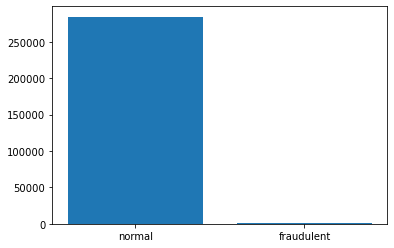

In [5]:
#CHECK IF DATASET IS BALANCED
fraud = dict(cdf['Class'].value_counts())
fraud['normal'] = fraud.pop(0)
fraud['fraudulent'] = fraud.pop(1)
labels, values = list(fraud.keys()), list(fraud.values())

plt.bar(labels, values)
res = values[0] + values[1]
per_fraud = values[1] / res
per_norm = values[0] / res

print('fraudulent transactions comprises of', 100*round(per_fraud, 6),'%', 'of total data')
print('normal transactions comprises of', 100*round(per_norm, 6),'%', 'of total data')

if per_fraud != per_norm:
    print('The dataset is imbalanced as there would be more legitimate transactions compared to fraudulent ones. This makes detection more difficult')

From the above analysis we can infer the following:
- fraudulent transactions comprises of 0.1727 % of total data
- normal transactions comprises of 99.8273 % of total data

The dataset is highly imbalanced with more normal transactions that fraudulent transaction. This makes detection of fraud more difficult

#### Statistical analysis of fraud and normal transactions

In [6]:
# Descriptive statistics of  of frauds transactions
summary = (cdf[cdf['Class'] == 1].describe().transpose().reset_index())

summary = summary.rename(columns = {"index" : "feature"})
summary = np.around(summary,3)
summary

,feature,count,mean,std,min,25%,50%,75%,max
0,Time,492.0,80746.807,47835.365,406.000,41241.500,75568.500,128483.000,170348.000
1,V1,492.0,-4.772,6.784,-30.552,-6.036,-2.342,-0.419,2.132
2,V2,492.0,3.624,4.291,-8.402,1.188,2.718,4.971,22.058
3,V3,492.0,-7.033,7.111,-31.104,-8.643,-5.075,-2.276,2.250
4,V4,492.0,4.542,2.873,-1.313,2.373,4.177,6.349,12.115
5,V5,492.0,-3.151,5.372,-22.106,-4.793,-1.523,0.215,11.095
6,V6,492.0,-1.398,1.858,-6.406,-2.502,-1.425,-0.413,6.474
7,V7,492.0,-5.569,7.207,-43.557,-7.965,-3.034,-0.946,5.803
8,V8,492.0,0.571,6.798,-41.044,-0.195,0.622,1.765,20.007
9,V9,492.0,-2.581,2.501,-13.434,-3.872,-2.209,-0.788,3.354


In [7]:
# Descriptive statistics of geniune transactions
summary = (cdf[cdf['Class'] == 0].describe().transpose().reset_index())

summary = summary.rename(columns = {"index" : "feature"})
summary = np.around(summary,3)
summary

,feature,count,mean,std,min,25%,50%,75%,max
0,Time,284315.0,94838.202,47484.016,0.000,54230.000,84711.000,139333.000,172792.000
1,V1,284315.0,0.008,1.930,-56.408,-0.918,0.020,1.316,2.455
2,V2,284315.0,-0.006,1.636,-72.716,-0.599,0.064,0.800,18.902
3,V3,284315.0,0.012,1.459,-48.326,-0.885,0.182,1.028,9.383
4,V4,284315.0,-0.008,1.399,-5.683,-0.850,-0.022,0.738,16.875
5,V5,284315.0,0.005,1.357,-113.743,-0.689,-0.053,0.612,34.802
6,V6,284315.0,0.002,1.330,-26.161,-0.767,-0.273,0.400,73.302
7,V7,284315.0,0.010,1.179,-31.765,-0.551,0.041,0.571,120.589
8,V8,284315.0,-0.001,1.161,-73.217,-0.209,0.022,0.326,18.709
9,V9,284315.0,0.004,1.089,-6.291,-0.640,-0.050,0.598,15.595


Fraudulent transactions: 
mean = 122 and standard deviation is 256
max = 2125 and min = 0

Normal transactions: 
mean = 88 and starndard deviation is 250
max = 25691 and min = 0

In [8]:
#Amount frequency for fraudulent transactions
cdf[(cdf['Class']==1)]['Amount'].value_counts().head(10)

1.00     113
0.00      27
99.99     27
0.76      17
0.77      10
0.01       5
3.79       4
2.00       4
12.31      3
1.18       3
Name: Amount, dtype: int64

There are 113 fraud transactions for one pound and 27 for 99.99 pounds.
There are 27 fraud transactions for zero pounds, these could be a part of a default procedure used by companies to verify card holders without charge.

#### Checking for duplicates

In [9]:
#CHECK FOR DUPLICATE ROWS
duplicate = cdf[cdf.duplicated()]
duplicate

#number of duplicates can be an important aspect to consider when looking at fraudulent transactions

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
33,26.0,-0.529912,0.873892,1.347247,0.145457,0.414209,0.100223,0.711206,0.176066,-0.286717,...,0.046949,0.208105,-0.185548,0.001031,0.098816,-0.552904,-0.073288,0.023307,6.14,0
35,26.0,-0.535388,0.865268,1.351076,0.147575,0.433680,0.086983,0.693039,0.179742,-0.285642,...,0.049526,0.206537,-0.187108,0.000753,0.098117,-0.553471,-0.078306,0.025427,1.77,0
113,74.0,1.038370,0.127486,0.184456,1.109950,0.441699,0.945283,-0.036715,0.350995,0.118950,...,0.102520,0.605089,0.023092,-0.626463,0.479120,-0.166937,0.081247,0.001192,1.18,0
114,74.0,1.038370,0.127486,0.184456,1.109950,0.441699,0.945283,-0.036715,0.350995,0.118950,...,0.102520,0.605089,0.023092,-0.626463,0.479120,-0.166937,0.081247,0.001192,1.18,0
115,74.0,1.038370,0.127486,0.184456,1.109950,0.441699,0.945283,-0.036715,0.350995,0.118950,...,0.102520,0.605089,0.023092,-0.626463,0.479120,-0.166937,0.081247,0.001192,1.18,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
282987,171288.0,1.912550,-0.455240,-1.750654,0.454324,2.089130,4.160019,-0.881302,1.081750,1.022928,...,-0.524067,-1.337510,0.473943,0.616683,-0.283548,-1.084843,0.073133,-0.036020,11.99,0
283483,171627.0,-1.464380,1.368119,0.815992,-0.601282,-0.689115,-0.487154,-0.303778,0.884953,0.054065,...,0.287217,0.947825,-0.218773,0.082926,0.044127,0.639270,0.213565,0.119251,6.82,0
283485,171627.0,-1.457978,1.378203,0.811515,-0.603760,-0.711883,-0.471672,-0.282535,0.880654,0.052808,...,0.284205,0.949659,-0.216949,0.083250,0.044944,0.639933,0.219432,0.116772,11.93,0
284191,172233.0,-2.667936,3.160505,-3.355984,1.007845,-0.377397,-0.109730,-0.667233,2.309700,-1.639306,...,0.391483,0.266536,-0.079853,-0.096395,0.086719,-0.451128,-1.183743,-0.222200,55.66,0


#### Analysing variable distribution and correlations

Text(0.5, 1.0, 'Distribution of transaction time')

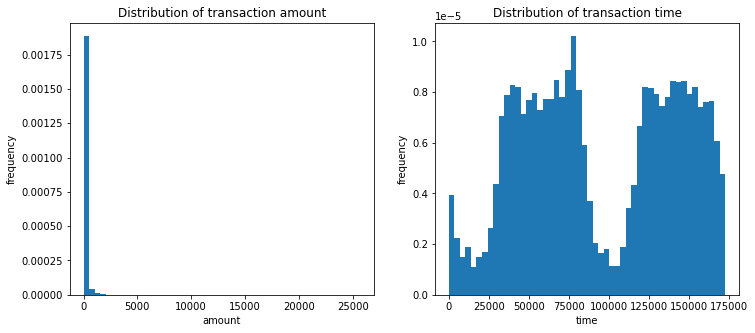

In [10]:
#Plotting distribution graphs for the known variables and then plotting amount vs time graph

fig, axes = plt.subplots(1,2, squeeze = False, figsize = (12,5))

amount = cdf.Amount.values
time = cdf.Time.values

axes[0][0].hist(amount, 50, density=True)
axes[0][0].set_xlabel('amount')
axes[0][0].set_ylabel('frequency')
axes[0][0].set_title('Distribution of transaction amount')

axes[0][1].hist(time, 50, density=True)
axes[0][1].set_xlabel('time')
axes[0][1].set_ylabel('frequency')
axes[0][1].set_title('Distribution of transaction time')


Text(0, 0.5, 'amount')

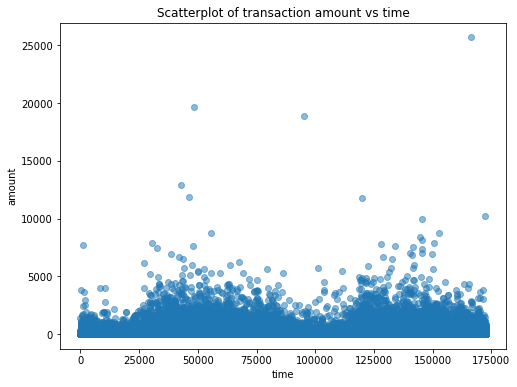

In [11]:
#Scatter plot of transaction amount vs time
fig, axes = plt.subplots(1, figsize=(8,6))

axes.scatter(time, amount, alpha = 0.5)
axes.set_title('Scatterplot of transaction amount vs time')
axes.set_xlabel('time')
axes.set_ylabel('amount')

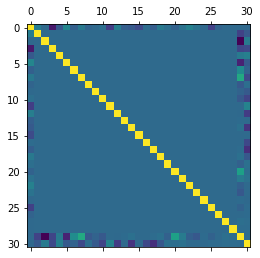

In [93]:
#Heatmap to visialize the correlations

corr = cdf.corr()
plt.matshow(corr)
plt.show()

In [14]:
#Displaying correlation co-efficients in descending order
corr[corr < 1].unstack().transpose()\
    .sort_values( ascending=False)\
    .drop_duplicates()

V7      Amount    0.397311
Amount  V20       0.339403
        V6        0.215981
V5      Time      0.173072
V11     Class     0.154876
                    ...   
V17     Class    -0.326481
V5      Amount   -0.386356
Time    V3       -0.419618
V2      Amount   -0.531409
Time    Time           NaN
Length: 466, dtype: float64

The variables V3 and Time, V2 and Amount, V7 and Amount, V20 and amount are moderately correlated and are explored further

Text(0, 0.5, 'V2o')

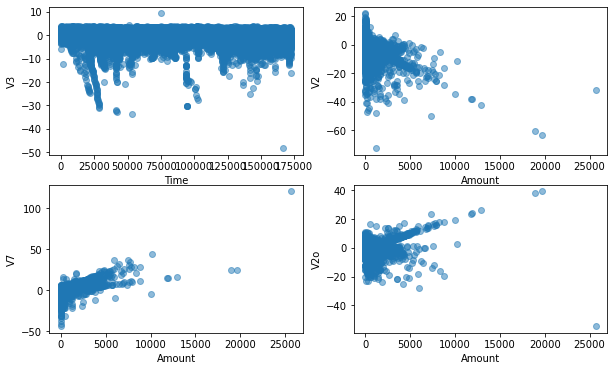

In [15]:
##Plotting scatter plots for correlated variables

fig, axes = plt.subplots(2, 2, figsize=(10, 6))

axes[0][0].scatter(x = cdf['Time'], y = cdf['V3'], alpha = 0.5)
axes[0][0].set_xlabel('Time')
axes[0][0].set_ylabel('V3')

axes[0][1].scatter(x = cdf['Amount'], y = cdf['V2'], alpha = 0.5)
axes[0][1].set_xlabel('Amount')
axes[0][1].set_ylabel('V2')

axes[1][0].scatter(x = cdf['Amount'], y = cdf['V7'], alpha = 0.5)
axes[1][0].set_xlabel('Amount')
axes[1][0].set_ylabel('V7')

axes[1][1].scatter(x = cdf['Amount'], y = cdf['V20'], alpha = 0.5)
axes[1][1].set_xlabel('Amount')
axes[1][1].set_ylabel('V2o')


## 3. Pre-processing applied (20 marks)
Enter the code in the cells below to execute each of the stated sub-tasks. 


###  a) Preparing the labels appropriately

In [16]:
#The labels are prepared appropriately in the form of Boolean values, 1 - fraudulent transaction and 0 - normal transaction

###  b) Removing synonymous and noisy attributes


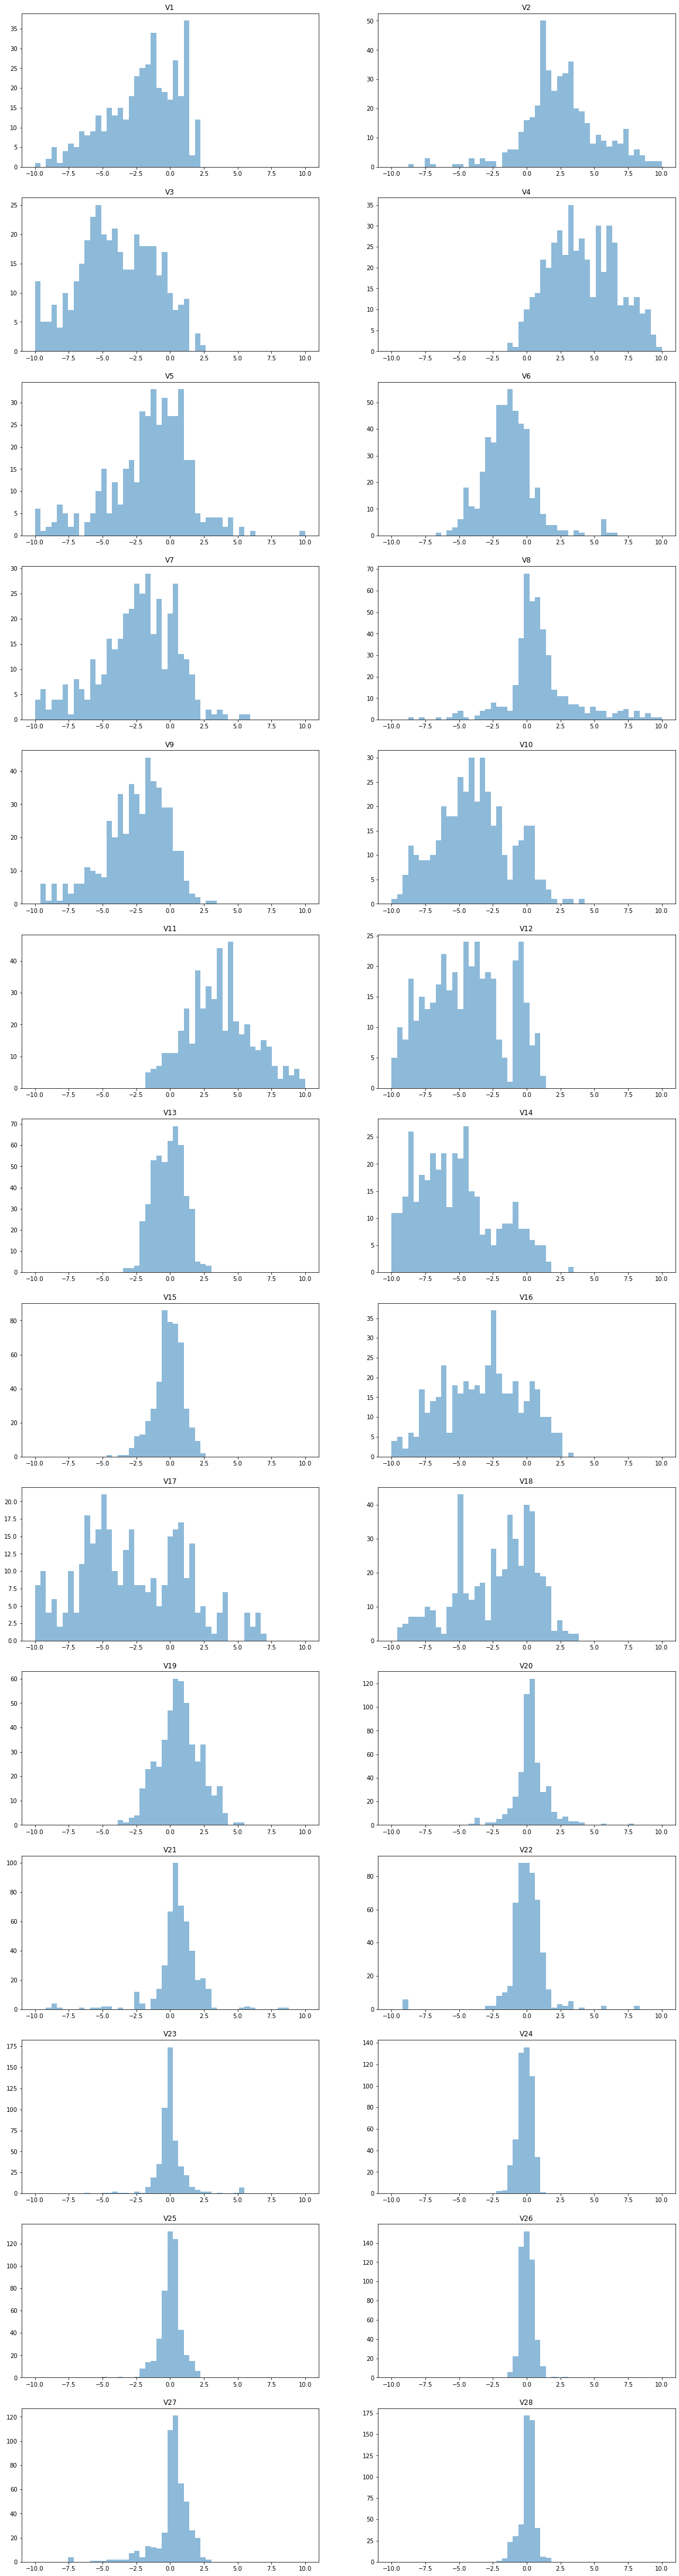

In [203]:
##Splitting attributes into fraudulent and normal and then comparing distributions for both to find usefull attributes
import matplotlib.gridspec as gridspec

#Choosing the unknown attributes
feature = cdf.iloc[:, 1:29].columns

fraud = cdf.Class == 1
normal = cdf.Class == 0

df1 = cdf[cdf['Class'] == 1]
df2 = cdf[cdf['Class'] == 0]

bins = np.linspace(-10, 10, 50)

graph = gridspec.GridSpec(14, 2)
plt.figure(figsize = (20, 20*4))

for n, feat in enumerate(cdf[feature]):   
    axes = plt.subplot(graph[n])
    
    #Alternate views between feature distribution for fraudulent data and normal data
    axes.hist(cdf[feat][fraud],bins, alpha = 0.5)
    #axes.hist(cdf[feat][normal], bins, alpha = 0.5)
    
    axes.set_title(str(feat))
    
plt.show()
    

On comparing the distributions for the different classes it can be observed that there are clear distinctions for most variables. Attributes from V20 onwards are dropped because they have a similar distribution for both fraudulent and normal transactions. It was noticed that fraudulent transactions have distributions which are highly skewed and asymmetric when compared to normal transactions.

In [3]:
#dropping columns

data = cdf.drop(labels = ['V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28'], axis = 1)
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V12,V13,V14,V15,V16,V17,V18,V19,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,69.99,0


###  c) Dealing with missing values


In [ ]:
#There are no missing values in the given dataset 

###  d) Rescaling if necessary


In [4]:
#Amount needs to be rescaled 
from sklearn.preprocessing import RobustScaler

#RobustScaler is less prone to outliers
rob_scaler = RobustScaler()
data['scaled_amount'] = rob_scaler.fit_transform(data['Amount'].values.reshape(-1,1))
data['scaled_time'] = rob_scaler.fit_transform(data['Time'].values.reshape(-1,1))
data.drop(['Amount', 'Time'], axis=1, inplace=True)
data.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V13,V14,V15,V16,V17,V18,V19,Class,scaled_amount,scaled_time
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0,1.783274,-0.994983
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,0,-0.269825,-0.994983
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0,4.983721,-0.994972
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,0,1.418291,-0.994972
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0,0.670579,-0.994960


### e) Other

In [252]:
data.describe()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V12,V13,V14,V15,V16,V17,V18,V19,Class,scaled_amount
count,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,1.758702e-12,-8.252296e-13,-9.637438e-13,8.316234e-13,1.592013e-13,4.247308e-13,-3.050183e-13,8.692882e-14,-1.179710e-12,7.094921e-13,...,1.053507e-12,7.137575e-13,-1.491369e-13,-5.225946e-13,-2.280687e-13,-6.428451e-13,4.958999e-13,7.060690e-13,0.001727,0.927124
std,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,1.088850e+00,...,9.992014e-01,9.952742e-01,9.585956e-01,9.153160e-01,8.762529e-01,8.493371e-01,8.381762e-01,8.140405e-01,0.041527,3.495006
min,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,-2.458826e+01,...,-1.868371e+01,-5.791881e+00,-1.921433e+01,-4.498945e+00,-1.412985e+01,-2.516280e+01,-9.498746e+00,-7.213527e+00,0.000000,-0.307413
25%,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,-5.354257e-01,...,-4.055715e-01,-6.485393e-01,-4.255740e-01,-5.828843e-01,-4.680368e-01,-4.837483e-01,-4.988498e-01,-4.562989e-01,0.000000,-0.229162
50%,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,-9.291738e-02,...,1.400326e-01,-1.356806e-02,5.060132e-02,4.807155e-02,6.641332e-02,-6.567575e-02,-3.636312e-03,3.734823e-03,0.000000,0.000000
75%,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,4.539234e-01,...,6.182380e-01,6.625050e-01,4.931498e-01,6.488208e-01,5.232963e-01,3.996750e-01,5.008067e-01,4.589494e-01,0.000000,0.770838
max,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,2.374514e+01,...,7.848392e+00,7.126883e+00,1.052677e+01,8.877742e+00,1.731511e+01,9.253526e+00,5.041069e+00,5.591971e+00,1.000000,358.683155


#### Splitting pre-processed data into input and output variables

In [5]:
#Dividing into input and output variables
X = data.drop(['Class'],axis=1)
y = data["Class"]

#### Specifying training and testing data

In [6]:
#specifying testing and training data set, 30/70% split
#data is split using stratification, random state to control the randomisation
#Stratification is used to preserve the proportion of examples in each class as observed in the original dataset which is imbalanced
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.3,random_state=42,stratify=y)

#### Handling class imbalance

In [7]:
#Handling class imbalance using SMOTE
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline

over = SMOTE()
over_sam = RandomOverSampler()
under_sam = RandomUnderSampler()

#list of transforms and final estimator to add to the pipeline
steps = [('o', over), ('os', over_sam),('u',under_sam)]
pipeline = Pipeline(steps=steps)

#### Standardizing and centering data and method for confusion matrix

In [8]:
from sklearn.preprocessing import StandardScaler

standard_sc = StandardScaler()

#fit the model and sample with the final estimator
X_train, y_train = pipeline.fit_resample(X_train, y_train)

#Fit training data and transform it
X_train=standard_sc.fit_transform(X_train)

#standardize and center test data
X_test=standard_sc.transform(X_test)

In [53]:
## Method for confusion Matrix 
from sklearn.metrics import confusion_matrix

def conf_mat(y_test,y_test_pred,X):
    #Classify into Fraudulent and Normal
    names=['Normal','Fraudulent']
    
    #confusion matrix to evaluate the accuracy of binary classification (ground truth, estimated values)
    cm=confusion_matrix(y_test,y_test_pred)
    
    #plot definitions
    fig, ax = plt.subplots(figsize=(5, 5))
    ax.matshow(cm, cmap=plt.cm.GnBu, alpha = 0.5)
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(x=j, y=i,s=cm[i, j], va='center', ha='center')
 
    plt.xlabel('predicted class', fontsize=12)
    plt.ylabel('actual class', fontsize=12)
    plt.title(X, fontsize=12)
    plt.show()

    return

## 4. Technique 1 - Random Forest (20 marks)

### a) Discuss your motivation for choosing the technique and provide a schematic figure of the process

100-200 words

Random Forests are ensemble learning methids that can be used for classification or regression. It is a supervised learning algorithm and is used since the lables for the two distinct classes are provided. Random Forest Classifier was used as the classification algorith due to its high accuracy as it uses multiple decision trees to classify. This usage of multiple trees also prevents the model from overfitting. It does not rely on the importance of a single feature of a single decison tree and works well with data having discrete classes. The dataset is divided into distinct classes (Fraudulent and Normal transactions). Most importantly, it performs well on highly imbalanced data such as as this one and works well with resampling techniques like SMOTE, undersampling and oversampling. On the flipside, Random Forest classifier takes more training time and processing power for larger datasets.

The model with default parameters was trained with the given data and the mean accuracy on test data and labels was found out and confusion matrix plotted. The most important attribute to make decisions was found out with the help of gini index and the top 5 were plotted according to importance. Parameters were then defined and optimized with the help of GridSearchCV. Finally, performance metrics were measured using confusion matrix, accuracy, precision, recall, F-1 scores and ROC curves.


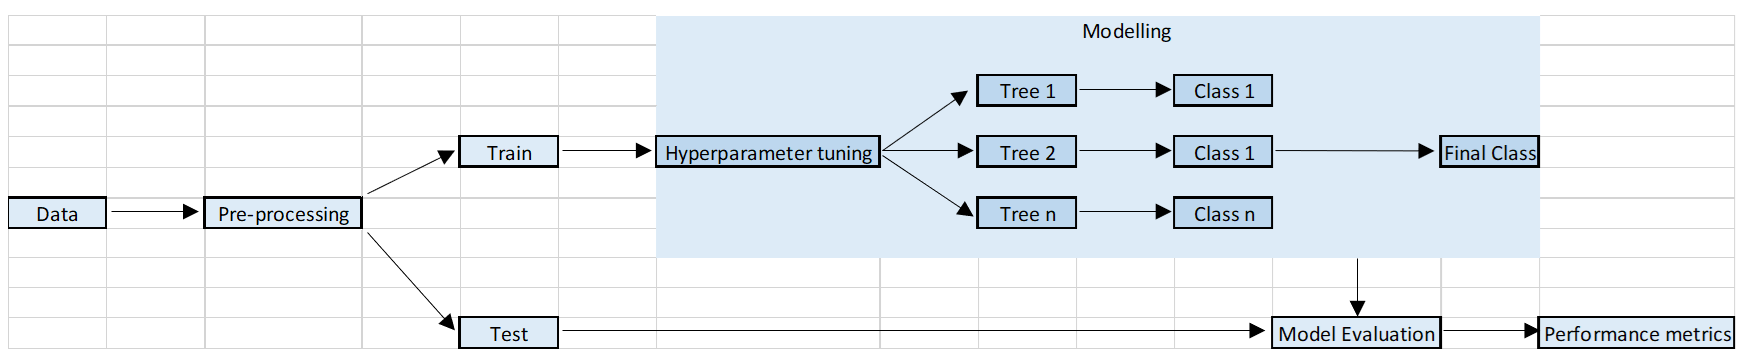

Enter the correct code in the cells below to execute each of the stated sub-tasks.
### b) Setting hyper parameters with rationale


In [10]:
#Random Forest Classifier fits decision tree classifiers onto sub samples of the dataset
from sklearn.ensemble import RandomForestClassifier

RF = RandomForestClassifier(random_state=42)

#build forest of trees from training set x-train and y-train
RF.fit(X_train, y_train)

#predict class for X
pred = RF.predict(X_test)

#mean accuracy on given test data and labels
score = RF.score(X_test,y_test)
score

0.9993914071369217

<AxesSubplot:>

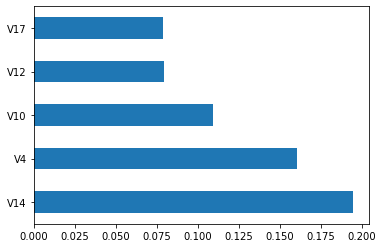

In [11]:
#calculate gini importance. computed as the normalized total reduction of the criterion brought by the feature
feat_importances = pd.Series(RF.feature_importances_, index=data.drop('Class',axis=1).columns)
feat_importances.nlargest(5).plot(kind='barh')

In [12]:
##Random Forest Classifier with parameters defined
clf = RandomForestClassifier(random_state=42)
params_RF = {
    'n_estimators': [200, 400],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}

### c) Optimising hyper parameters


In [14]:
from sklearn.model_selection import GridSearchCV

#-1 jobs means it uses all processors, cv-3-fold cross validation in this case
model_RF = GridSearchCV(clf,param_grid=params_RF, cv=3,n_jobs=-1, scoring='roc_auc')

#The fit is now run with the optimized parameters
model_RF.fit(X_train,y_train)

GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 5, 6, 7, 8],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [200, 400]},
             scoring='roc_auc')

In [15]:
#predicting estimators with optimized parameters
y_train_pred_RF = model_RF.predict(X_train)
y_test_pred_RF = model_RF.predict(X_test)

### d) Performance metrics for training

In [16]:
from sklearn.metrics import classification_report

print(classification_report(y_train, y_train_pred_RF))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98    199020
           1       1.00      0.96      0.98    199020

    accuracy                           0.98    398040
   macro avg       0.98      0.98      0.98    398040
weighted avg       0.98      0.98      0.98    398040



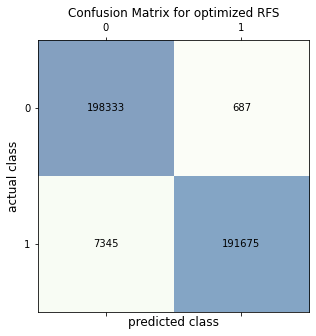

In [54]:
conf_mat(y_train,y_train_pred_RF,"Confusion Matrix for optimized RFS")

In [68]:
from sklearn.metrics import roc_auc_score, roc_curve
auc = roc_auc_score(y_train, y_train_pred_RF)
print('AUC - Train Set: %.2f%%' % (auc*100))

AUC - Train Set: 97.98%


## Technique 2 - Decision Trees

### a) Discuss your motivation for choosing the technique and  provide a schematic figure of the process

100-200 words

Decision trees are supervised machine learning algorithms which splits the data continuously according to a certain parameter. It can also handle both classification and regression problems like random forest classifier. This algorithm is also done to compare performance and feature selection with the random classifier algorithm employed earlier. This algorithm is also robust to outliers which are found in this dataset. It is also quicker to train the model as compared to random forest as it generates only one tree and not a group of trees like the latter. This is not based on a bagging method like Random Forest classifier. Decision trees also deal with non-linear variables very well as non-linearity does not affect its performance. Some variables in this dataset displayed a non-gaussian distribution and hence were infered to be non-linear.

The model with default parameters was trained with the given data and the mean accuracy on test data and labels was found out and confusion matrix plotted. The most important attribute to make decisions was found out with the help of gini index and the top 5 were plotted according to importance. Parameters were then defined and optimized with the help of GridSearchCV. Finally, performance metrics were measured using confusion matrix, accuracy, precision, recall, F-1 scores and ROC curves.

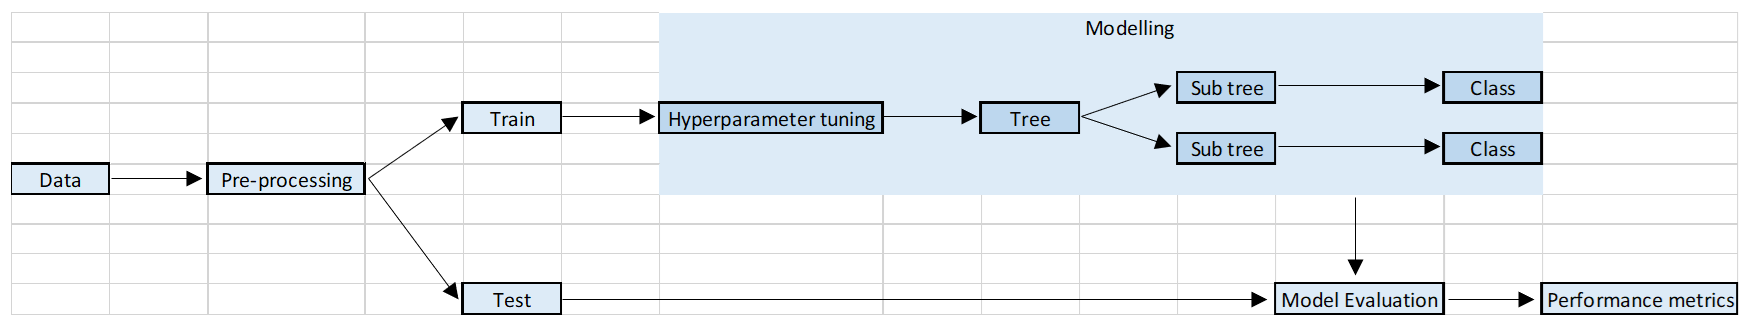

Enter the correct code in the cells below to execute each of the stated sub-tasks.
### b) Setting hyper parameters with rationale


In [56]:
#Decision tree classifiers onto sub samples of the dataset
from sklearn.tree import DecisionTreeClassifier

DT = dt_classifier = DecisionTreeClassifier()

#build forest of trees from training set x-train and y-train
DT.fit(X_train, y_train)

#predict class for X
pred = DT.predict(X_test)

#mean accuracy on given test data and labels
score = DT.score(X_test,y_test)
score

0.9974837025853494

<AxesSubplot:>

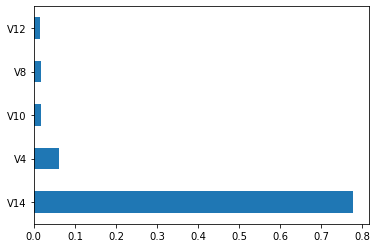

In [57]:
#calculate gini importance. computed as the normalized total reduction of the criterion brought by the feature
#feat_importances = pd.Series(LR.feature_importances_, index=data.drop('Class',axis=1).columns)

feat_importances = pd.Series(DT.feature_importances_, index=data.drop('Class',axis=1).columns)
feat_importances.nlargest(5).plot(kind='barh')

In [88]:
##Decision Tree Classifier with parameters defined
dtf = DecisionTreeClassifier(random_state=42)
params_DT = {
        "max_depth":[50],
        "criterion":["gini", "entropy"],
        'min_samples_split': [2,4,6],
        "min_samples_leaf":[1,2,3],
}

### c) Optimising hyper parameters


In [128]:
from sklearn.model_selection import GridSearchCV

#-1 jobs means it uses all processors, cv-3-fold cross validation in this case
model_DT = GridSearchCV(dtf, param_grid = params_DT, cv = 3, n_jobs=-1, scoring='roc_auc')

#The fit is now run with the optimized parameters
model_DT.fit(X_train,y_train)

#logr = model_DT.best_estimator_ 
#model_DT.best_params_, model_DT.best_score_

GridSearchCV(cv=3, estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'], 'max_depth': [50],
                         'min_samples_leaf': [1, 2, 3],
                         'min_samples_split': [2, 4, 6]},
             scoring='roc_auc')

In [129]:
#predicting estimators with optimized parameters
y_train_pred_DT = model_DT.predict(X_train)
y_test_pred_DT = model_DT.predict(X_test)

### d) Performance metrics for training

In [130]:
from sklearn.metrics import classification_report

print(classification_report(y_train, y_train_pred_DT))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    199020
           1       1.00      1.00      1.00    199020

    accuracy                           1.00    398040
   macro avg       1.00      1.00      1.00    398040
weighted avg       1.00      1.00      1.00    398040



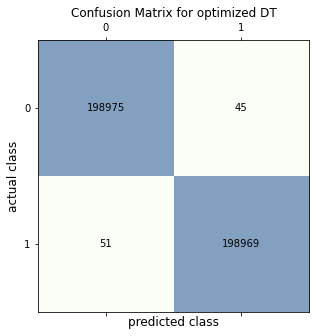

In [131]:
conf_mat(y_train,y_train_pred_DT,"Confusion Matrix for optimized DT")

In [132]:
from sklearn.metrics import roc_auc_score, roc_curve
auc = roc_auc_score(y_train, y_train_pred_DT)
print('AUC - Train Set: %.2f%%' % (auc*100))

AUC - Train Set: 99.98%


## 5. Technique 3 - Naive Bayes (20 marks)

### a) Discuss your motivation for choosing the technique and  provide a schematic figure of the process

100-200 words

Naive Bayes is a supervised learning algorithm used for predictive modelling and supports both multiclass and binary classifications. Gaussian Naive Bayes was used for this dataset since it supports continuous values and the target variable if of boolean form, supporting binary classification. It also assumes that each feature is normally distributed, since this is not the case in a real world situation, the data is modified accordingly to train the model. Naive Bayes is a quick learner as it requires less training data and is a faster classifier for large datasets such as this one. It was used to comply with limited time and processing resources. This algorithm assumes that all features in a dataset are independent of each other and gives each feature equal importance. Naive Bayes algorithm has been found to perform well on continuously changing real world data-sets such as credit card data.

The model with default parameters was trained with the given data and the mean accuracy on test data and labels was found out and confusion matrix plotted. The most important attribute to make decisions was found out with the help of gini index and the top 5 were plotted according to importance. Parameters were then defined and optimized with the help of GridSearchCV. Finally, performance metrics were measured using confusion matrix, accuracy, precision, recall, F-1 scores and ROC curves.

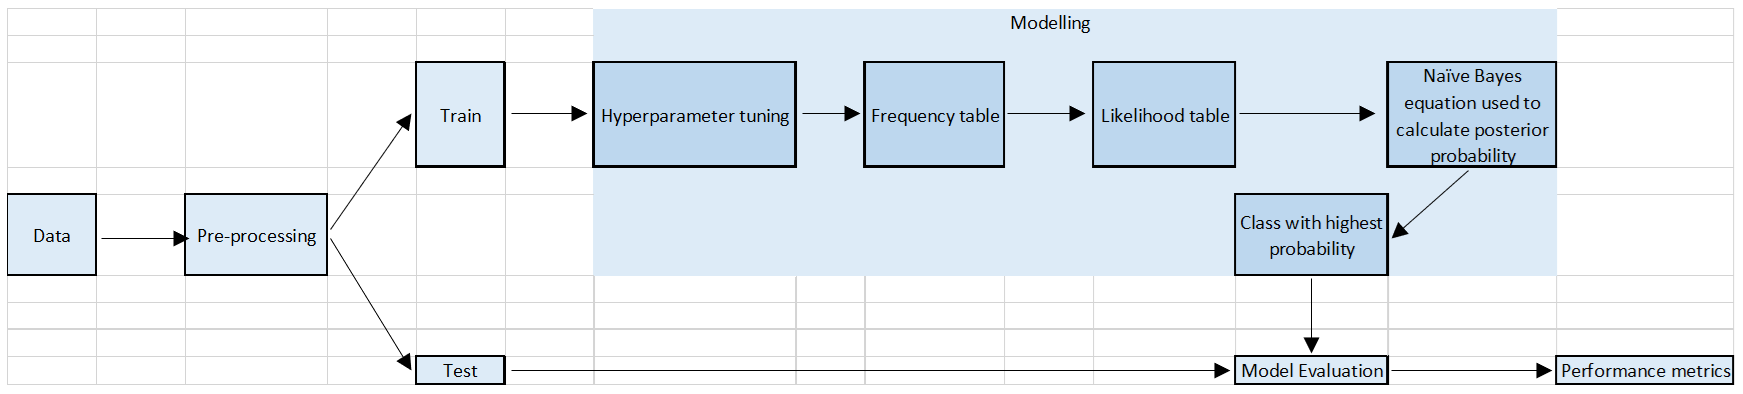

Enter the correct code in the cells below to execute each of the stated sub-tasks.
### b) Setting hyper parameters with rationale


In [94]:
#Logistic Regression
from sklearn.naive_bayes import GaussianNB

NB = GaussianNB()

#build forest of trees from training set x-train and y-train
NB.fit(X_train, y_train)

#predict class for X
pred = NB.predict(X_test)

#mean accuracy on given test data and labels
score = NB.score(X_test,y_test)
score

0.9810633989911403

Naive Bayes algorithm does not have a feature importance attribute since it works by determining conditional and unconditional probabilities assosciated with features. This also makes it faster since no coefficients are needed to be fitted by GridSearchCV.

In [98]:
##Decision Tree Classifier with parameters defined
nbc = GaussianNB()
params_NB = {'var_smoothing': np.logspace(0,-9, num=100)}

### c) Optimising hyper parameters


Naive Bayes algorithm uses variance smoothing for stability of calculation. This algorithm assumes that all features follow normal distribution, which is unlikely for real world situations. Power transformation is used to   make features more or less normally distributed.

In [109]:
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import PowerTransformer

#-1 jobs means it uses all processors, cv-3-fold cross validation in this case
model_NB = GridSearchCV(nbc, param_grid = params_NB, cv = 3, n_jobs=-1, scoring='roc_auc')

Data_train = PowerTransformer().fit_transform(X_train)
Data_test = PowerTransformer().fit_transform(X_test)

#The fit is now run with the optimized parameters
model_NB.fit(Data_train,y_train)

#logr = model_DT.best_estimator_ 
#model_NB.best_params_, model_DT.best_score_

GridSearchCV(cv=3, estimator=GaussianNB(), n_jobs=-1,
             param_grid={'var_smoothing': array([1.00000000e+00, 8.11130831e-01, 6.57933225e-01, 5.33669923e-01,
       4.32876128e-01, 3.51119173e-01, 2.84803587e-01, 2.31012970e-01,
       1.87381742e-01, 1.51991108e-01, 1.23284674e-01, 1.00000000e-01,
       8.11130831e-02, 6.57933225e-02, 5.33669923e-02, 4.32876128e-02,
       3.51119173e-02, 2.8480358...
       1.23284674e-07, 1.00000000e-07, 8.11130831e-08, 6.57933225e-08,
       5.33669923e-08, 4.32876128e-08, 3.51119173e-08, 2.84803587e-08,
       2.31012970e-08, 1.87381742e-08, 1.51991108e-08, 1.23284674e-08,
       1.00000000e-08, 8.11130831e-09, 6.57933225e-09, 5.33669923e-09,
       4.32876128e-09, 3.51119173e-09, 2.84803587e-09, 2.31012970e-09,
       1.87381742e-09, 1.51991108e-09, 1.23284674e-09, 1.00000000e-09])},
             scoring='roc_auc')

In [110]:
#predicting estimators with optimized parameters
y_train_pred_NB = model_NB.predict(Data_train)
y_test_pred_NB = model_NB.predict(Data_test)

### d) Performance metrics for training

In [111]:
from sklearn.metrics import classification_report

print(classification_report(y_train, y_train_pred_NB))

              precision    recall  f1-score   support

           0       0.84      1.00      0.91    199020
           1       1.00      0.81      0.90    199020

    accuracy                           0.91    398040
   macro avg       0.92      0.91      0.90    398040
weighted avg       0.92      0.91      0.90    398040



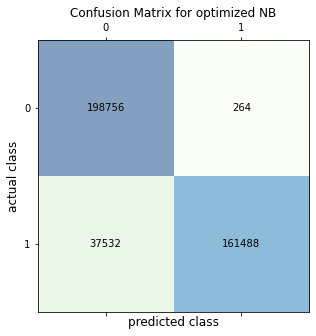

In [112]:
conf_mat(y_train,y_train_pred_NB,"Confusion Matrix for optimized NB")

In [113]:
from sklearn.metrics import roc_auc_score, roc_curve
auc = roc_auc_score(y_train, y_train_pred_NB)
print('AUC - Train Set: %.2f%%' % (auc*100))

AUC - Train Set: 90.50%


## 6. Comparison of metrics performance for testing (16 marks)
Enter the correct code in the cells below to execute each of the stated sub-tasks. 


### a) Use of cross validation for both techniques to deal with over-fitting

In [ ]:
#Cross validation with 3 folds was performed with GridSearchCV 

### b) Comparison with appropriate metrics for testing

##### Random Forest

In [63]:
##RANDOM FOREST TREE TEST METRICS
from sklearn.metrics import classification_report

print(classification_report(y_test, y_test_pred_RF))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       0.29      0.84      0.43       148

    accuracy                           1.00     85443
   macro avg       0.64      0.92      0.71     85443
weighted avg       1.00      1.00      1.00     85443



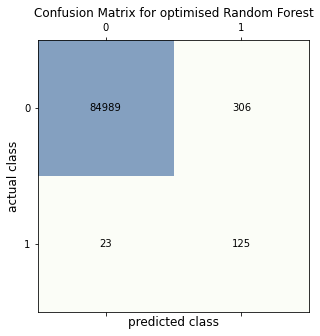

In [92]:
conf_mat(y_test, y_test_pred_RF,"Confusion Matrix for optimised Random Forest")

#### Decision Tree

In [133]:
##DECISION TREE TEST METRICS
from sklearn.metrics import classification_report

print(classification_report(y_test, y_test_pred_DT))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       0.41      0.78      0.54       148

    accuracy                           1.00     85443
   macro avg       0.70      0.89      0.77     85443
weighted avg       1.00      1.00      1.00     85443



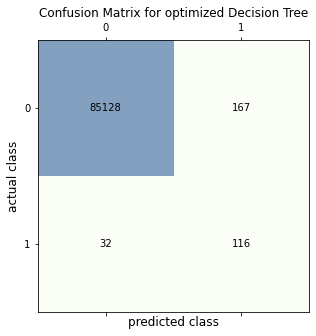

In [134]:
conf_mat(y_test, y_test_pred_DT,"Confusion Matrix for optimized Decision Tree")

##### Naive Bayes

In [118]:
##GAUSSIAN TEST METRICS
from sklearn.metrics import classification_report

print(classification_report(y_test, y_test_pred_NB))

              precision    recall  f1-score   support

           0       1.00      0.82      0.90     85295
           1       0.01      0.94      0.02       148

    accuracy                           0.82     85443
   macro avg       0.50      0.88      0.46     85443
weighted avg       1.00      0.82      0.90     85443



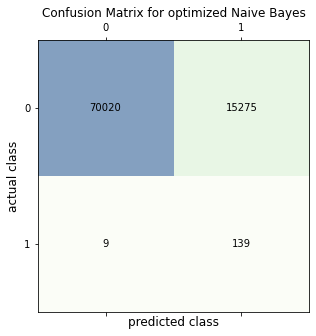

In [138]:
conf_mat(y_test, y_test_pred_NB,"Confusion Matrix for optimized Naive Bayes")

### c) Model selection (ROC or other charts)

##### Random Forest

In [20]:
from sklearn.metrics import roc_auc_score, roc_curve
auc = roc_auc_score(y_test, y_test_pred_RF)
print('AUC - Test Set: %.2f%%' % (auc*100))

AUC - Test Set: 92.05%


In [21]:
probRF = model_RF.predict_proba(X_test)

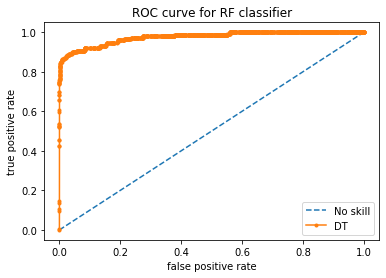

In [22]:
# calculate roc curve
fpr, tpr, thresholds = roc_curve(y_test, probRF[:,1])
# plot no skill
plt.plot([0, 1], [0, 1], linestyle='--', label = 'No skill')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.', label = 'DT')
# show the plot
plt.xlabel('false positive rate')
plt.ylabel('true positive rate')
plt.title('ROC curve for RF classifier')
plt.legend()
plt.show()

##### Decision Tree

In [135]:
from sklearn.metrics import roc_auc_score, roc_curve
auc = roc_auc_score(y_test, y_test_pred_DT)
print('AUC - Test Set: %.2f%%' % (auc*100))

AUC - Test Set: 89.09%


In [136]:
probDT = model_DT.predict_proba(X_test)

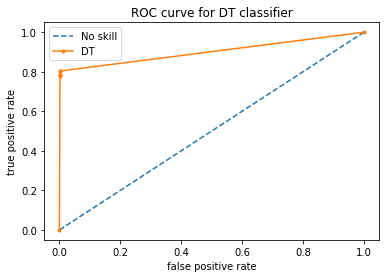

In [137]:
# calculate roc curve
fpr, tpr, thresholds = roc_curve(y_test, probDT[:,1])
# plot no skill
plt.plot([0, 1], [0, 1], linestyle='--', label = 'No skill')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.', label = 'DT')
# show the plot
plt.xlabel('false positive rate')
plt.ylabel('true positive rate')
plt.title('ROC curve for DT classifier')
plt.legend()
plt.show()

##### Naive Bayes

In [122]:
from sklearn.metrics import roc_auc_score, roc_curve
auc = roc_auc_score(y_test, y_test_pred_NB)
print('AUC - Test Set: %.2f%%' % (auc*100))

AUC - Test Set: 88.01%


In [123]:
probNB = model_NB.predict_proba(Data_test)

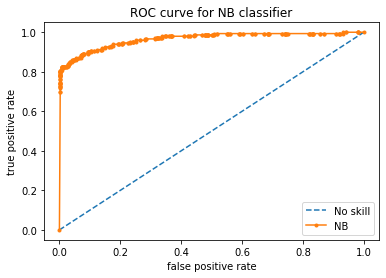

In [124]:
# calculate roc curve
fpr, tpr, thresholds = roc_curve(y_test, probNB[:,1])
# plot no skill
plt.plot([0, 1], [0, 1], linestyle='--', label = 'No skill')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.', label = 'NB')
# show the plot
plt.xlabel('false positive rate')
plt.ylabel('true positive rate')
plt.title('ROC curve for NB classifier')
plt.legend()
plt.show()

## 7. Final recommendation of best model (8 marks)

### a) Discuss the results from a technical perspective, for example, overfitting discussion, complexity and efficiency

100-200 words

Performance metrics, namely, accuracy score, precision score, recall score, f1 score, roc graph, auc score and confusion matrix were used to compare and identify the best model for detecting credit card fraud. In this case the cost of false negative would be higher than the cost of false positive so a model with a high recall score would be prefered. Other evaluation metrics would be used to analyze the models. Accuracy would not be the best metric to consider due to the highly imbalanced nature of the dataset. The inferences made for train and test set results were as below:

Random Forest
For train set, normal transactions precision was 0.96 and recall was 1 while for fraudulent transactions, precision was 1 and recall was 0.96. This means that normal transactions were slightly better predicted than fraudulent ones. Similarily, for the test set, normal transactions had a precision and recall of 1 while fraudulent transactions had a precision of 0.29 and recall of 0.84. Due to this imbalance in scores the F-1 score for fraud transactions also dropped in test metrics. The auc score was 92.05% for the test set. This summarizes the area under the ROC curve and would be used as the main metric for model comparison.
This model utilizes the most processing power and time out of all as it uses bootstrapping on a forest of trees to find the best class. This model also avoids overfitting to an extent and had the highest test set accuracy (1.00) among others.

Decision Tree
It was observed that the train set overfit while using decision tree as perfect precision, recall, auc and f-1 scores were obtained during training. This can affect test scores as it failed to find patterns in the train set. There were no change in the results after reducing the depth of the tree. It performed fairly well on the test set with precision of 0.41 and recall of 0.78, giving an f-1 score of 0.54. The auc score was 89.09%, less than Random Forest. This model was faster than random forest but not as accurate since it employs the use of a singular decision tree to classify.

Naive Bayes
This algorithm assumes that all features are independent of each other and have normal distributions. Since this is not the case, further methods were applied before training to transform data into normal distributions. Therefore, more pre-processing was needed for this algorithm. It took the least time in training and classifying owing to its simplistic nature. It was noticed that the precison and recall scores for fraudulent transactions were extremely low and high respectively, resulting in an F-1 score of 0.02. The auc score of 88.01% was the least.

All models had similar ROC curves (the more it bends towarsd the top left corner the better the model). Decision tree had the best balance between precision and recall.

Ultimately from a technical perspective, Random Forest woud be recommended as long as there is sufficent processing power and time at hand otherwise a decision tree can be used.

### b) Discuss the results from a business perspective, for example, results interpretation, relevance and balance with technical perspective

100-200 words

Different models such as Random Forest, Decision tree and Naive Bayes were utilised to predict which transactions were fraud. According to the business model, not being able to identify a fraudulent transaction (false negatives) would cost more and harm the banks reputation. Therefore the goal is to minimize the number of false negatives and if possible the number of false positives with it. 

The confusion matrix indicates that Naive Bayes predicts the lowest number of false negatives, followed by random forest and then decision tree. It also predicts the most number of false positives(15275) followed by random forest and decision tree.  Taking only the the goal to minimize false negatives into account, Naive Bayes would be better but Random Forest provides the best overall balance between precison and recall. The total cost to the bank solely based on cost of predicting false negative and false positive, based on the confusion matrix was calculated. Decision tree was the cheapest option, followed by random forest. naive bayes cost the most due to it extremely low number of false negatives and extremely high number of false negatives. If cost is the only concern then Decision Tree should be chosen.

Other business aspects that could be factors in the model selection process are processing resources and time to run the above models on larger datasets. Random Forest would take the most amount of resources but shows less chances of overfitting on training data. Overall, if processing power and time are not of concern then Random Forest can be used since it has better overall performance metrics and would perform well on larger datasets.

## 8. Conclusion (8 marks)

### a) What has been successfully accomplished and what has not been successful?
100-300 words

Exploratory analysis of the dataset and making inferences were successfully accomplished. It was inferred that variables of fraudulent transactions had a skewed distribution when compared to normal transactions.
Feature reduction was carried out with the help of plotting and comparing distributions of normal and fraudulent transactions. Preprocessing was carried out successfully and class imbalance was handled using under sampling and over sampling methods. 3 techniques were successfully explored and further pre processing of data was caried out specific to each technique. The overall efficiency of ensemble methods and lazy learner were compared and the best model was recommended. The business restrictions allow a budget of 20k for each 100m of non fraudulent transactions, since there isn't that much worth in the dataset the cost of model exceeds the set budget. Similarily for the amount of fraudulent transactions, there isn't 200k worth in the dataset. Unfortunately, the models were unable to comply to the budget restrictions set by the bank and more work would be required to improve the models or set a realistic budget.

### b) Reflecting back on the analysis, what could you have done differently if you were to do the project again?

100-300 words

In hindsight, more resampling and rescaling methods could have been explored and employed. Various methods for feature selection could have been explored such as wrapper (recursive feature elimination) and filter methods. Plots such as box plots could've been used for exploratory analysis to make further inferences and identify patterns. Most importantly, less process and time intensive algorithms could have been used to facilitate repeated code changes. Methods to avoid overfitting could have been explored. Logistic Regression and SVM algorithms could have been experimented with by hypertuning parameters. Algorithms like KNN and Logistic Regression were attempted but yielded contrasting and odd results, it would be interesting to work on them more by experimenting with different pre-processing techniques. Additionally, model accuracy could be experimented with by dropping duplicated values and comparing to model accuracy without dropping duplicate values. A similar process could have been done for outliers and compared. 


### c) Provide a wish list of future work that you would like to do

100-200 words

I would like to explore the performance of non-linear algorithms such as KNN, Artificial Neural Networks, Support Vector Machines and compare it to the performance of ensemble algorithms such as stochastic gradient boosting, extra trees and so on. Trying to figure out different ways to deal with imbalanced datasets (other than SMOTE) like this one could also prove to be quite interesting. I would also like to work on finding different methods to analyse feature importance during the exploratory analysis stage. Analysing how different training and test splits change the results could help identify the ideal test split for large and imbalanced datasets. Furthermore, I would also like to investigate how big of a role factors like name of the bank, time of transaction, country etc play in a fraudulent transaction.